In [239]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt ,seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [240]:
inp0=pd.read_csv("C:\\Users\\moham\\Downloads\\inputs\\application_data.csv")
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [241]:
inp1=pd.read_csv("C:\\Users\\moham\\Downloads\\inputs\\previous_application.csv")
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
#checking the column names in application data
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [243]:
#These columns dont add any value for analysis so droping them
s=inp0.loc[:,"FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"]

In [244]:
#dropped the selected columns
inp0 = inp0.drop(columns=s.columns)

In [245]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
null=inp0.isnull().sum()

In [247]:
len(inp0)

307511

In [248]:
# selecting columns with more than 35% of null values
column_s=null[null>=(.35*len(inp0))]

In [249]:
#selecting column names
column_n=column_s.index.to_list()

In [250]:
#Dropping columns with more than 35% of null values
inp0.drop(columns=column_n,inplace=True)

In [251]:
#Checking null values
inp0.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REGION_RATING_CLIENT               0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
HOUR_APPR_PROCESS_START            0
WEEKDAY_APPR_PROCESS_START         0
R

In [252]:
#checking occupational category
inp0.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [253]:
#Changing null values to unknown in occupation column
inp0.OCCUPATION_TYPE=inp0.OCCUPATION_TYPE.apply(lambda x: "Unknown" if pd.isna(x) else x)

In [254]:
#Checking null values
inp0.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
REG_REGION_NOT_WORK_REGION         0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_CITY_NOT_WORK_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
R

In [255]:
#Dropping EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_RE_CREDIT_BUREAU_HOUR
inp0.drop(columns=["EXT_SOURCE_2","EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"],inplace=True)

In [256]:
inp0.isnull().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                1292
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
HOUR_APPR_PROCESS_START           0
FLAG_EMAIL                        0
OCCUPATION_TYPE                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
REG_CITY_NOT_LIVE_CITY            0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
FLAG_CONT_MOBILE                  0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
ORGANIZATION_TYPE                 0
FLAG_PHONE                        0
SK_ID_CURR                        0
FLAG_WORK_PHONE                   0
TARGET                            0
NAME_CONTRACT_TYPE          

In [257]:
#Imputing Unaccompanied in nan values.
inp0.NAME_TYPE_SUITE.fillna(value="Unaccompanied",inplace=True)

In [258]:
#imputing zero for nan values as nan may mean no one defaulted
inp0.DEF_30_CNT_SOCIAL_CIRCLE.fillna(value=0.0,inplace=True)
inp0.DEF_60_CNT_SOCIAL_CIRCLE.fillna(value=0.0,inplace=True)

In [259]:
#imputing zero for nan values as nan may mean no one defaulted
inp0.OBS_30_CNT_SOCIAL_CIRCLE.fillna(value=0.0,inplace=True)
inp0.OBS_60_CNT_SOCIAL_CIRCLE.fillna(value=0.0,inplace=True)

In [260]:
float(278*100/len(inp0))

0.09040327012692229

In [261]:
#we can drop the rows for rest of null value
inp0.dropna(inplace=True)

In [262]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0


In [263]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [264]:
inp0.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37659
-1.0        2812
-2.0        2316
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3656.0        1
-3651.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [265]:
#Dropping some columns as these columns don't seem relevant or similar information available in table
inp0.drop(columns=["REGION_POPULATION_RELATIVE", "CNT_FAM_MEMBERS",'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],inplace=True)

In [266]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,Laborers,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,Core staff,MONDAY,11,School,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,Laborers,MONDAY,9,Government,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,Laborers,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,Core staff,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,-1106.0


In [267]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307220 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307220 non-null  int64  
 1   TARGET                      307220 non-null  int64  
 2   NAME_CONTRACT_TYPE          307220 non-null  object 
 3   CODE_GENDER                 307220 non-null  object 
 4   FLAG_OWN_CAR                307220 non-null  object 
 5   FLAG_OWN_REALTY             307220 non-null  object 
 6   CNT_CHILDREN                307220 non-null  int64  
 7   AMT_INCOME_TOTAL            307220 non-null  float64
 8   AMT_CREDIT                  307220 non-null  float64
 9   AMT_ANNUITY                 307220 non-null  float64
 10  AMT_GOODS_PRICE             307220 non-null  float64
 11  NAME_TYPE_SUITE             307220 non-null  object 
 12  NAME_INCOME_TYPE            307220 non-null  object 
 13  NAME_EDUCATION

In [268]:
inp0.FLAG_OWN_CAR.value_counts()

N    202637
Y    104583
Name: FLAG_OWN_CAR, dtype: int64

In [269]:
#Converting XNA to F as number of females are more.
inp0.CODE_GENDER=inp0.CODE_GENDER.replace("XNA","F")

In [270]:
#Converting Days_Birth to a rounded age
inp0["Age"]=inp0.DAYS_BIRTH.apply(lambda x: int(round(abs(x/365),0)))

In [271]:
inp0.drop(columns="DAYS_BIRTH",inplace=True)

In [273]:
#Keeping number of days positive.
inp0["DAYS_ID_PUBLISH"]=inp0.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
inp0["DAYS_REGISTRATION"]=inp0.DAYS_REGISTRATION.apply(lambda x: abs(x))

In [274]:
#Dropping flag details as not giving the info may be also due to another reasons and everyone has provided atleast phone number
inp0.drop(columns=["FLAG_EMAIL","FLAG_CONT_MOBILE","FLAG_EMP_PHONE","FLAG_MOBIL","FLAG_PHONE","FLAG_WORK_PHONE"],inplace=True) 

In [275]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,MONDAY,11,School,1.0,0.0,1.0,0.0,-828.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,MONDAY,9,Government,0.0,0.0,0.0,0.0,-815.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,THURSDAY,11,Religion,0.0,0.0,0.0,0.0,-1106.0,55


In [276]:
inp0.shape

(307220, 29)

In [277]:
#Removing highest outliers in income column
inp0=inp0[inp0.AMT_INCOME_TOTAL<2000000]

<AxesSubplot:>

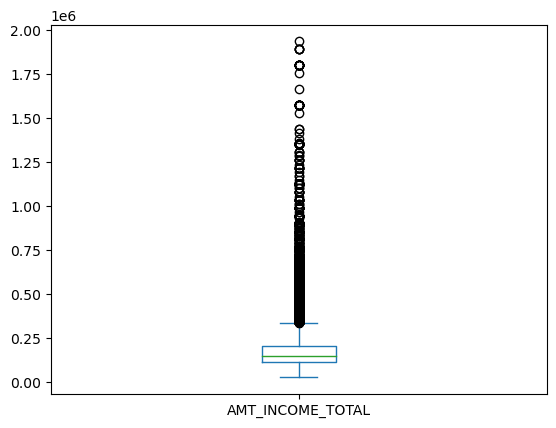

In [278]:
inp0.AMT_INCOME_TOTAL.plot.box()

In [294]:
inp0[inp0["ORGANIZATION_TYPE"]=="XNA"][["DAYS_EMPLOYED"]].value_counts()

DAYS_EMPLOYED
365243           55350
dtype: int64

In [297]:
#After checking the data values were organiztion type is XNA is giving invalid values in same rows as days employed thus it seems these rows are faulted and can be removed
inp0=inp0.drop(inp0.loc[inp0.ORGANIZATION_TYPE=="XNA"].index)


In [300]:
#Creating a column years employed
inp0["Years_EMPLOYED"]=inp0.DAYS_EMPLOYED.apply(lambda x: int(round(abs(x/365),1)))

In [302]:
inp0.DAYS_EMPLOYED=inp0.DAYS_EMPLOYED.apply(lambda x:abs(x))

In [305]:
inp0.DAYS_LAST_PHONE_CHANGE=inp0.DAYS_LAST_PHONE_CHANGE.apply(lambda x:abs(x))

In [311]:
#dropping WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START
inp0.drop(columns=["HOUR_APPR_PROCESS_START","WEEKDAY_APPR_PROCESS_START"],inplace=True)

In [312]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251826 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SK_ID_CURR                251826 non-null  int64  
 1   TARGET                    251826 non-null  int64  
 2   NAME_CONTRACT_TYPE        251826 non-null  object 
 3   CODE_GENDER               251826 non-null  object 
 4   FLAG_OWN_CAR              251826 non-null  object 
 5   FLAG_OWN_REALTY           251826 non-null  object 
 6   CNT_CHILDREN              251826 non-null  int64  
 7   AMT_INCOME_TOTAL          251826 non-null  float64
 8   AMT_CREDIT                251826 non-null  float64
 9   AMT_ANNUITY               251826 non-null  float64
 10  AMT_GOODS_PRICE           251826 non-null  float64
 11  NAME_TYPE_SUITE           251826 non-null  object 
 12  NAME_INCOME_TYPE          251826 non-null  object 
 13  NAME_EDUCATION_TYPE       251826 non-null  o

In [307]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [313]:
inp1.drop(columns=['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY','NFLAG_INSURED_ON_APPROVAL'],inplace=True)

In [318]:
inp1.shape

(1670214, 32)

In [317]:
inp1.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAME_TYPE_SUITE               820405
DAYS_LAST_DUE                 673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_FIRST_DUE                673065
DAYS_FIRST_DRAWING            673065
DAYS_TERMINATION              673065
AMT_GOODS_PRICE               385515
AMT_ANNUITY                   372235
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
AMT_CREDIT                         1
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_TYPE                 0
AMT_APPLICATION                    0
NAME_YIELD_GROUP                   0
NAME_SELLER_INDUSTRY               0
SELLERPLACE_AREA                   0
CHANNEL_TYPE                       0
NAME_PRODUCT_TYPE                  0
NAME_PORTFOLIO                     0
NAME_GOODS_CATEGORY                0
NAME_CLIENT_TYPE                   0
SK_ID_CURR                         0
C

In [325]:
#selecting columns with null values more than 35%
cols=inp1.columns[inp1.isnull().sum()>(.35*len(inp1))]

In [326]:
#dropping selected columns
inp1.drop(columns=cols,inplace=True)

In [327]:
inp1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

In [332]:
#Looking through the dat it seems nan in annuity means zero annuity amount
inp1.AMT_ANNUITY.fillna(0,inplace=True)

In [333]:
inp1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

In [337]:
inp1[inp1.AMT_GOODS_PRICE.isna()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,0.0,0.0,0.0,NaN,XNA,Canceled,-14,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,0.0,0.0,0.0,NaN,XNA,Canceled,-21,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
8,2367563,342292,Cash loans,0.0,0.0,0.0,NaN,XNA,Canceled,-386,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
9,2579447,334349,Cash loans,0.0,0.0,0.0,NaN,XNA,Canceled,-57,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
22,1172842,302212,Cash loans,0.0,0.0,0.0,NaN,XNA,Refused,-239,...,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670186,1433968,272570,Cash loans,0.0,0.0,0.0,NaN,XNA,Canceled,-21,...,Repeater,XNA,XNA,XNA,Contact center,-1,XNA,NaN,XNA,Cash
1670187,1971628,435554,Cash loans,0.0,0.0,0.0,NaN,XNA,Canceled,-134,...,Repeater,XNA,XNA,XNA,Contact center,-1,XNA,NaN,XNA,Cash
1670190,2381880,175920,Cash loans,0.0,0.0,0.0,NaN,XNA,Canceled,-243,...,Repeater,XNA,XNA,XNA,Contact center,-1,XNA,NaN,XNA,Cash
1670192,2101747,339383,Revolving loans,3375.0,0.0,67500.0,NaN,XAP,Approved,-540,...,Refreshed,XNA,Cards,x-sell,AP+ (Cash loan),10,XNA,0.0,XNA,Card X-Sell


In [346]:
#Seeing data i think we can drop XNA and XAP rows in NAME_CASH_LOAN_PURPOSE
inp1=inp1[~((inp1.NAME_CASH_LOAN_PURPOSE=="XNA") | (inp1.NAME_CASH_LOAN_PURPOSE=="XAP"))]

In [348]:
#As % of null values are small now dropping all null values
inp1.dropna(inplace=True)

In [350]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69372 entries, 4 to 1670206
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SK_ID_PREV              69372 non-null  int64  
 1   SK_ID_CURR              69372 non-null  int64  
 2   NAME_CONTRACT_TYPE      69372 non-null  object 
 3   AMT_ANNUITY             69372 non-null  float64
 4   AMT_APPLICATION         69372 non-null  float64
 5   AMT_CREDIT              69372 non-null  float64
 6   AMT_GOODS_PRICE         69372 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  69372 non-null  object 
 8   NAME_CONTRACT_STATUS    69372 non-null  object 
 9   DAYS_DECISION           69372 non-null  int64  
 10  NAME_PAYMENT_TYPE       69372 non-null  object 
 11  CODE_REJECT_REASON      69372 non-null  object 
 12  NAME_CLIENT_TYPE        69372 non-null  object 
 13  NAME_GOODS_CATEGORY     69372 non-null  object 
 14  NAME_PORTFOLIO          69372 non-nu

In [359]:
#if payment is made and not recorded its mostly cash paid in bank
inp1.NAME_PAYMENT_TYPE=inp1.NAME_PAYMENT_TYPE.replace("XNA","Cash through the bank")

In [364]:
#If not a repeater or refreshed as recorded mostly XNA will be new
inp1.NAME_CLIENT_TYPE=inp1.NAME_CLIENT_TYPE.replace("XNA","New")

In [367]:
#dropping NAME_GOODS_CATEGORY as it is null column
inp1.drop(columns="NAME_GOODS_CATEGORY",inplace=True)

In [376]:
inp1.drop(columns=["SELLERPLACE_AREA","NAME_SELLER_INDUSTRY"],inplace=True)

In [377]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,Cash,x-sell,Credit and cash offices,18.0,low_normal,Cash X-Sell: low
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,45000.0,Everyday expenses,Refused,-584,Cash through the bank,HC,Repeater,Cash,walk-in,AP+ (Cash loan),18.0,high,Cash Street: high
51,2664403,163660,Cash loans,9804.285,67500.0,82611.0,67500.0,Car repairs,Approved,-766,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,12.0,high,Cash Street: high
85,1981960,306707,Cash loans,10678.005,225000.0,269550.0,225000.0,Building a house or an annex,Refused,-13,Cash through the bank,SCOFR,Repeater,Cash,walk-in,Credit and cash offices,36.0,low_normal,Cash Street: low


In [378]:
inp=pd.merge(left=inp0,right=inp1,how="inner",on="SK_ID_CURR",suffixes="_x")

In [379]:
inp

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,-599,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,-119,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,-695,Cash through the bank,XAP,Refreshed,Cash,walk-in,Channel of corporate sales,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,-539,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,-449,Cash through the bank,LIMIT,Repeater,Cash,walk-in,Credit and cash offices,24.0,low_normal,Cash Street: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51147,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,-637,Cash through the bank,LIMIT,Repeater,Cash,walk-in,Contact center,24.0,middle,Cash Street: middle
51148,456236,0,Cash loans,M,Y,Y,0,585000.0,1575000.0,43443.0,...,-1759,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,12.0,high,Cash Street: high
51149,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,...,-2150,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,12.0,high,Cash Street: high
51150,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,-448,Cash through the bank,XAP,New,Cash,walk-in,Country-wide,12.0,high,Cash Street: high
